# Estimating and Analyzing Sleep Stages Through Wearable Sleep Tracker

#### Ufuk Cefakar, Mehmet Furkan Çalışkan

Abstract 

Context:
Obstructive sleep apnea (OSA) is a prevalent sleep disorder causing apnea and hypopnea episodes, linked to cardiovascular diseases and hypertension. Polysomnography (PSG) is effective but costly and requires specialized equipment. This project uses the Dreamt dataset to analyze physiological data like electrodermal activity and heart rate variability for sleep stage detection via machine learning, while studying the impact of conditions like diabetes and hypertension on sleep apnea severity. The aim is to create accessible, affordable tools for smart devices.

Purpose:
This project seeks to overcome traditional diagnostic limitations for sleep apnea by using machine learning to detect sleep stages and apnea severity through physiological data. It explores links between markers and conditions like diabetes and hypertension to develop cost-effective sleep monitoring tools and better understand sleep apnea factors.

Method:
Machine learning models, including XGBoost, Random Forest, SGDClassifier, and Deep Learning, were applied to the Dreamt dataset. Physiological data such as electrodermal activity and heart rate variability were analyzed. Matplotlib was used for visualizing correlations between sleep apnea and comorbidities like diabetes and hypertension.

Results:
Machine learning models effectively detected sleep stages and highlighted correlations between sleep apnea and comorbidities. Key findings and model performances are presented in the "Experiment Results" section.

Keywords:
OSA, apnea, hypopnea, PSG, EEG, EOG, Sleep stages, Machine Learning, Deep Learning, Sleep disorders, EDA, BVP, HR, BMI, OAHI

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Goal:
The overarching goal of our project is to improve the understanding and detection of sleep-related disorders and sleep stages using physiological data. Specifically:
Correlation Analysis: Investigate relationships between patient medical history, demographic data, and sleep disorders with specific apnea events (Obstructive Apnea, Central Apnea, Hypopnea).
Sleep Stage Detection: Develop a machine learning model capable of detecting sleep stages using physiological data, reducing reliance on traditional EEG/EOG methods.

Scope:
1.	Data Exploration and Correlation Analysis:
Utilize the participant_info dataset to analyze relationships between medical and demographic factors (e.g., AGE, GENDER, BMI, MEDICAL_HISTORY, Sleep_Disorders) and sleep disorder events such as Obstructive Apnea, Central Apnea, and Hypopnea, identifying patterns or significant predictors for these events.
2.	Model Development for Sleep Stage Detection:
For sleep stage classification, preprocess data by handling missing values and normalizing metrics, extract features like derivatives and statistical measures, and use dimensionality reduction (e.g., PCA). Train and evaluate models (e.g., Random Forest, SVM) using cross-validation and metrics like accuracy and F1-score.


Research Questions

#### 1.	RQ1. Relationship Analysis:

RQ1.1. What is the relationship between ages and the time spent in sleep stages? (3.5.7.)

RQ1.2. How do patterns in measurements relate to sleep stages, and what insights can they provide about patients during sleep? (3.5.7)

RQ1.3 How does a patient’s medical history influence the occurrence of the most prevalent apnea events? (4.2.3)

#### 2.	RQ2. Sleep Stage Detection:

RQ2.1 Can physiological signals like EDA, BVP, and HR effectively distinguish between sleep and wake states without relying on traditional EEG/EOG measures? (4.2.3)

RQ2.2 Which physiological signals and machine learning models are most effective in accurately estimating sleep stages, and how do they compare in performance? (4.2.2)

RQ2.3 What is the relationship between sleep apnea and associated conditions like excessive daytime sleepiness (EDS), depression, bruxism, and snoring, compared to common comorbidities like hypertension? (4.2.3)

RQ2.4 What is the relationship between patients' transitions through sleep stages and their likelihood of entering the W state? (4.2.4)


## Data Understanding<a class="anchor" id="data_understanding"></a>

Participant Information Dataset:
This dataset provides demographic, clinical, and sleep-related attributes that are essential for the initial correlation analysis. The key variables required include:


\begin{array}{|l|l|l|}
\hline
\text{Column Name} & \text{Description} & \text{Data Type} \\
\hline
\text{SID} & \text{A unique identifier for each participant.} & \text{Categorical} \\
\hline
\text{AGE} & \text{Numerical data representing the participant's age.} & \text{Numerical} \\
\hline
\text{GENDER} & \text{Categorical data denoting gender.} & \text{Categorical} \\
\hline
\text{BMI} & \text{Numerical data reflecting the participant's Body Mass Index.} & \text{Numerical} \\
\hline
\text{OAHI} & \text{Obstructive Apnea-Hypopnea Index, a numerical metric quantifying apnea events.} & \text{Numerical} \\
\hline
\text{AHI} & \text{Apnea-Hypopnea Index, a summary measure of both apnea and hypopnea events.} & \text{Numerical} \\
\hline
\text{Mean\_SaO2} & \text{Numerical data indicating the mean oxygen saturation level during sleep.} & \text{Numerical} \\
\hline
\text{Arousal Index} & \text{A numerical value representing the frequency of sleep disturbances.} & \text{Numerical} \\
\hline
\text{MEDICAL\_HISTORY} & \text{Categorical or multi-label data capturing patient health conditions.} & \text{Categorical/Multi-Label} \\
\hline
\text{Sleep\_Disorders} & \text{Categorical data indicating the presence or type of sleep disorders.} & \text{Categorical} \\
\hline
\end{array}


To ensure data quality, the dataset must be free of duplicate entries, contain consistent units (e.g., BMI in kg/m², SaO2 as a percentage), and have uniform categorical labels.
Patient Data Dataset:
This dataset comprises physiological measurements and annotations that form the basis for machine learning-based sleep stage detection. The essential variables include:

\begin{array}{|l|l|l|}
\hline
\text{Column Name} & \text{Description} & \text{Data Type} \\
\hline
\text{TIMESTAMP} & \text{A consistent and well-formatted record of data collection times (e.g., ISO 8601).} & \text{Numerical} \\
\hline
\text{BVP} & \text{Numerical data representing cardiovascular activity.} & \text{Numerical} \\
\hline
\text{ACC\_X, ACC\_Y, ACC\_Z} & \text{Numerical data from accelerometer readings that capture body movements.} & \text{Numerical} \\
\hline
\text{TEMP} & \text{Numerical data for skin temperature.} & \text{Numerical} \\
\hline
\text{EDA} & \text{Numerical data reflecting sympathetic nervous system activity.} & \text{Numerical} \\
\hline
\text{HR} & \text{Numerical data derived from the BVP signal.} & \text{Numerical} \\
\hline
\text{IBI} & \text{Numerical data representing the time intervals between consecutive heartbeats.} & \text{Numerical} \\
\hline
\text{Sleep\_Stage} & \text{Categorical data denoting sleep stages (e.g., Wake, N1, N2, N3, REM).} & \text{Categorical} \\
\hline
\text{Obstructive\_Apnea} & \text{Binary annotation for obstructive apnea events.} & \text{Binary} \\
\hline
\text{Central\_Apnea} & \text{Binary annotation for central apnea events.} & \text{Binary} \\
\hline
\text{Hypopnea} & \text{Binary annotation for hypopnea events.} & \text{Binary} \\
\hline
\text{Multiple\_Events} & \text{Binary annotation for multiple respiratory events.} & \text{Binary} \\
\hline
\end{array}

## Data Preparation<a class="anchor" id="data_preparation"></a>

Explain what kind of data transformations, feature selection and/or engineering you will perform.

We have shrinked the data with mean, first and other shrinking methods since our computer rams aren't capable of processing the whole dataset, filled the NaN values with appropriate items. You can see the shrinker function along with its efficient version inside, they are also provided here:
### pipeline_script


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def pipeline(file_name):
    """
    This is the pipeline function that processes the patient data.

    :param file_name: The name of the file containing patient data.
    :type file_name: str
    :return: The processed DataFrame.
    :rtype: pandas.DataFrame
    """
    patient_df = pd.read_csv(file_name)
    numeric_columns = [x for x in patient_df.columns if pd.api.types.is_numeric_dtype(patient_df[x])]
   
    patient_df.loc[:,["TIMESTAMP","BVP","ACC_X","ACC_Y","ACC_Z","TEMP","EDA","HR","IBI","Sleep_Stage"]].bfill(inplace=True) # Fill numeric columns with backfill
    patient_df.loc[:,["Obstructive_Apnea","Central_Apnea","Hypopnea","Multiple_Events"]] = patient_df.loc[:,["Obstructive_Apnea","Central_Apnea","Hypopnea","Multiple_Events"]].isna().astype(int)
    
    patient_df["IBI_Moving_Average_640"] = patient_df["IBI"].rolling(64*10).mean() #Every 64 rows contain a second, which means our window contains a 10 second average
    patient_df["IBI_Moving_STD_640"] = patient_df["IBI"].rolling(64*10).std() 

    patient_df["Abnormal_IBI_Moving_3"] =  (abs(patient_df["IBI_Moving_Average_640"] - patient_df["IBI"]) > 3*patient_df["IBI_Moving_STD_640"]).astype(int)
    patient_df["Abnormal_IBI_Moving_4"] =  (abs(patient_df["IBI_Moving_Average_640"] - patient_df["IBI"]) > 4*patient_df["IBI_Moving_STD_640"]).astype(int)
    
    patient_df.loc[:,["Abnormal_IBI_Moving_4","Abnormal_IBI_Moving_3","IBI_Moving_STD_640","IBI_Moving_Average_640","IBI"]] =     patient_df.loc[:,["Abnormal_IBI_Moving_4","Abnormal_IBI_Moving_3","IBI_Moving_STD_640","IBI_Moving_Average_640","IBI"]].bfill()

    patient_df["ACC"] = np.sqrt(patient_df["ACC_X"]**2 + patient_df["ACC_Y"]**2 + patient_df["ACC_Z"]**2)
    
    return patient_df

def shrink_data(df: pd.DataFrame,shrink_factor):
    """
    This function shrinks the dataframe of a patient by the provided factor, while clearing the nan values with appropriate fillings.

    :param df: The dataframe containing the patient data.
    :type df: pandas.DataFrame
    :param shrink_factor: The factor by which to shrink or adjust the data.
    :type shrink_factor: int
    :return: The modified dataframe after applying the shrink factor.
    :rtype: pandas.DataFrame
    """
    shrinked = df
    numeric_col_list = shrinked.select_dtypes("float64").columns#["TIMESTAMP","BVP","ACC_X","ACC_Y","ACC_Z","TEMP","EDA","HR","IBI"]
    numeric_columns = shrinked.loc[:,numeric_col_list]
    sleep_stage = shrinked.loc[:,["Sleep_Stage"]]
    #diseases = shrinked.loc[:,[col for col in shrinked.columns if col not in numeric_col_list and col!= "Sleep_Stage"]]
    numeric_columns = numeric_columns.groupby(shrinked.index // shrink_factor).mean()
    sleep_stage = sleep_stage.groupby(shrinked.index // shrink_factor).first()
    #diseases = diseases.groupby(df.index // shrink_factor).any().astype(int)
    shrinked = pd.concat([numeric_columns,sleep_stage],axis = 1)
    return shrinked

The parts on feature engineering and why those features look important are provided in **Process.ipynb**, along with the other parts of the data processing.

We use these codes to obtain the fully processed data created after the process.ipynb

In [ ]:
import pandas as pd
import pipeline_script

In [ ]:
patient_records = pipeline_script.gather_dict("normalized_data_20",False)
participant_df = pd.read_csv("participant_info_processed.csv",index_col="SID")

## Modeling<a class="anchor" id="modeling"></a>

The models we have used in all experimetns combined:

Model 1.1. Random Forest

Model 1.2. Stochastic Gradient Descent (SGD)

Model 1.3. Gradient Boosting Methods (e.g., XGBoost)

Model 1.4. Logistic Regression

Model 2. Deep Learning Neural Network

Which model will be used? Why? What parameters?

In **Deep Learning Models.ipynb** , we used a 2 hidden layer neural network 

input - 128 - 64 - 5

although different activation functions are tried, only the best resulting ones are displayed.

we have also tried focal loss as loss function to solve class imbalance, but it failed

In [ ]:
import tensorflow as tf

In [ ]:
def focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss for multi-class classification.
    
    Parameters:
    gamma -- focusing parameter (default=2.)
    alpha -- balancing parameter (default=0.25)
    """
    def focal_loss_fixed(y_true, y_pred):
        # Clip the predicted values to avoid NaNs using TensorFlow function
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())

        # Cross entropy loss
        cross_entropy = -y_true * tf.math.log(y_pred)

        # Focal loss components
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=1)  # Use tf.reduce_sum instead of K.sum
    
    return focal_loss_fixed

We also had a different network consisting these layers

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
activation = "activation_function's name"

model = models.Sequential([
    layers.Dense(100, activation=activation,kernel_regularizer=l2(0.1)),
    layers.Dropout(0.5),
    layers.Dense(100, activation=activation,kernel_regularizer=l1(0.1)),
    layers.Dropout(0.5),
    layers.Dense(100, activation=activation,kernel_regularizer=l2(0.1)),
    layers.Dense(100, activation=activation,kernel_regularizer=l1(0.1)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Binary classification output
])

Same models were tried with different hyperparameters for predicting sleepfulness wakefulness.

For Random Forest and XGB, we have applied SMOTE to solve the class imbalance, but the accuracy instead went worse. To apply SMOTE we had to decrease the dimensionality since the smote uses a nearest neighbor algorithm which means both much more computation time and worse accuracy for higher dimensionality. So we applied PCA. The details are explained in **SMOTE,PCA, Models1.ipynb**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=X_train.shape[1])  

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, X_train.shape[1] + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

print("Cumulative Explained Variance:", cumulative_variance)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy = {0: 628034*3, 1: 2829313, 2: 156480*5,3: 573410*3,4: 1342855})

X_resampled, y_resampled = smote.fit_resample(X_train[:n], y_train_encoded[:n])

## Evaluation<a class="anchor" id="evaluation"></a>

### For Sleep Stage Estimation

\begin{array}{|l|c|c|c|c|c|}
\hline
\text{Metrics} & \text{Random Forest} & \text{SGD} & \text{XGB} & \text{Deep Learning} & \text{Logistic Regression} \\
\hline
\text{Accuracy} & 0.37 & 0.46 & 0.50 & 0.46 & 0.63 \\
\hline
\text{Precision} & 0.36 & 0.27 & 0.26 & 0.20 & 0.32 \\
\hline
\text{Recall} & 0.37 & 0.27 & 0.25 & 0.29 & 0.34 \\
\hline
\text{F1-Score} & 0.32 & 0.26 & 0.21 & 0.13 & 0.30 \\
\hline
\end{array}

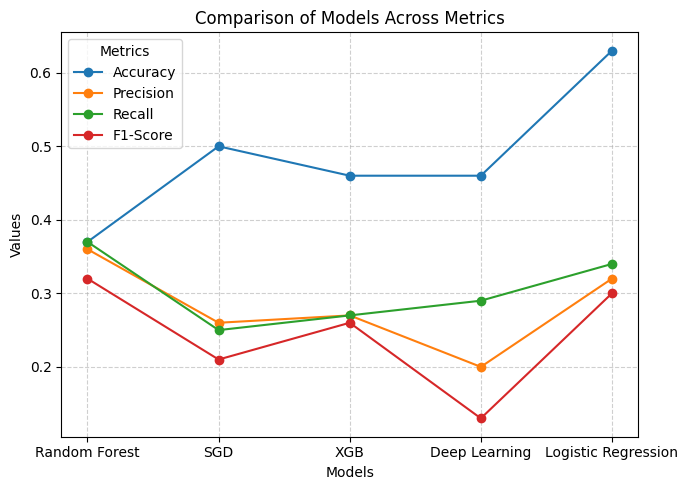

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    "Accuracy": [0.37, 0.50, 0.46, 0.46, 0.63],
    "Precision": [0.36, 0.26, 0.27, 0.20, 0.32],
    "Recall": [0.37, 0.25, 0.27, 0.29, 0.34],
    "F1-Score": [0.32, 0.21, 0.26, 0.13, 0.30],
}
models = ["Random Forest", "SGD", "XGB", "Deep Learning", "Logistic Regression"]

# Line plot with different colors
plt.figure(figsize=(7, 5))
colors = plt.cm.tab10(np.arange(len(data)))  # Use a colormap for distinct colors

for i, (metric, values) in enumerate(data.items()):
    plt.plot(models, values, label=metric, color=colors[i], marker="o")

# Add labels, title, and legend
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Comparison of Models Across Metrics")
plt.legend(title="Metrics")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

### For Sleep-Wakefulness prediction

For this task, we employed three different models to evaluate their performance, including two distinct configurations of the XGB classifier to explore its potential under varying setups. The following are the results we obtained from these experiments, highlighting the strengths and limitations of each approach.

\begin{array}{|l|c|c|c|c|}
\hline
\text{Metrics} & \text{XGB} & \text{XGB - Early Stopping} & \text{Deep Learning} & \text{Logistic Regression} \\
\hline
\text{Accuracy} & 0.65 & 0.72 & 0.75 & 0.72 \\
\hline
\text{Precision} & 0.56 & 0.59 & 0.36 & 0.61 \\
\hline
\text{Recall} & 0.59 & 0.60 & 0.50 & 0.61 \\
\hline
\text{F1-Score} & 0.56 & 0.59 & 0.42 & 0.61 \\
\hline
\end{array}

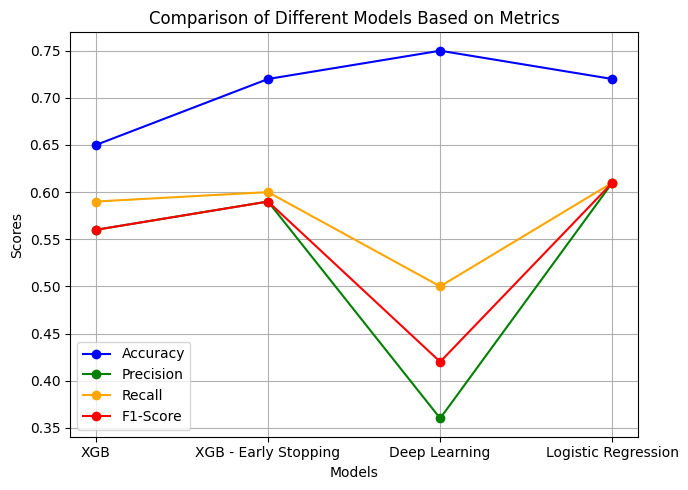

In [3]:
models = ['XGB', 'XGB - Early Stopping', 'Deep Learning', 'Logistic Regression']
accuracy = [0.65, 0.72, 0.75, 0.72]
precision = [0.56, 0.59, 0.36, 0.61]
recall = [0.59, 0.60, 0.50, 0.61]
f1_score = [0.56, 0.59, 0.42, 0.61]

# Set up the figure and axis
plt.figure(figsize=(7,5))

# Plot each metric with different colors
plt.plot(models, accuracy, label='Accuracy', color='blue', marker='o')
plt.plot(models, precision, label='Precision', color='green', marker='o')
plt.plot(models, recall, label='Recall', color='orange', marker='o')
plt.plot(models, f1_score, label='F1-Score', color='red', marker='o')

# Add title and labels
plt.title('Comparison of Different Models Based on Metrics')
plt.xlabel('Models')
plt.ylabel('Scores')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The experiment results indicate that our model struggles to predict certain classes, while performing better on others. Logistic Regression emerged as the most effective model for this task, followed by XGBoost. Although the Deep Learning model achieved relatively high accuracy, it failed to capture the underlying data relationships. The model predominantly predicts the N2 stage due to its sensitivity to class imbalance, and the class imbalance correction techniques were not sufficient to resolve this issue.

## References<a class="anchor" id="references"></a>

[1] T. Giles, T. Lasserson, B. Smith, J. White, J. Wright, and C. Cates, “Continuous positive airways pressure for obstructive sleep apnoea in adults,” Cochrane Database of Systematic Reviews, Jan. 2006, doi: https://doi.org/10.1002/14651858.cd001106.pub2.

[2] P. E. Peppard, T. Young, M. Palta, and J. Skatrud, “Prospective Study of the Association between Sleep-Disordered Breathing and Hypertension,” New England Journal of Medicine, vol. 342, no. 19, pp. 1378–1384, May 2000, doi: https://doi.org/10.1056/nejm200005113421901.

[3] E. SHAHAR et al., “Sleep-disordered Breathing and Cardiovascular Disease,” American Journal of Respiratory and Critical Care Medicine, vol. 163, no. 1, pp. 19–25, Jan. 2001, doi: https://doi.org/10.1164/ajrccm.163.1.2001008.

[4] N. M. Punjabi et al., “Sleep-Disordered Breathing and Mortality: A Prospective Cohort Study,” PLoS Medicine, vol. 6, no. 8, p. e1000132, Aug. 2009, doi: https://doi.org/10.1371/journal.pmed.1000132.

[5] T. Young, M. Palta, J. Dempsey, J. Skatrud, S. Weber, and S. Badr, “The occurrence of sleep-disordered breathing among middle-aged adults,” The New England journal of medicine, vol. 328, no. 17, pp. 1230–5, 1993, doi: https://doi.org/10.1056/NEJM199304293281704.

[6] Mehmet KARADAĞ and Ahmet URSAVAŞ, “Dünyada ve Türkiye’de Uyku Çalışmaları,” Turkiye Klinikleri Archives of Lung, vol. 8, no. 2, pp. 62–64, 2014, Accessed: Nov. 16, 2024. [Online]. Available: https://www.turkiyeklinikleri.com/article/en-dunyada-ve-turkiyede-uyku-calismalari-54777.html

[7] “How Much Does A Sleep Study Cost?,” Sleep Foundation, Mar. 31, 2023. https://www.sleepfoundation.org/sleep-studies/how-much-does-a-sleep-study-cost
[8] Penzel, T., Kantelhardt, J. W., Lo, C.-C., Voigt, K., & Vogelmeier, C. (2003). Dynamics of heart rate and sleep stages in normals and patients with sleep apnea. Neuropsychopharmacology, 28(S1). https://doi.org/10.1038/sj.npp.1300146 

[9] Wang, W. K., Yang, J., Hershkovich, L., Jeong, H., Chen, B., Singh, K., Roghanizad, A. R., Shandhi, M. M. H., Spector, A. R., & Dunn, J. (2024). Addressing wearable sleep tracking inequity: A new dataset and novel methods for a population with sleep disorders. In T. Pollard, E. Choi, P. Singhal, M. Hughes, E. Sizikova, B. Mortazavi, I. Chen, F. Wang, T. Sarker, M. McDermott, & M. Ghassemi (Eds.), Proceedings of the fifth Conference on Health, Inference, and Learning (Vol. 248, pp. 380–396). PMLR. https://proceedings.mlr.press/v248/wang24a.html

[10] Gaiduk, M., Perea, J. J., Seepold, R., Martinez Madrid, N., Penzel, T., Glos, M., & Ortega, J. A. (2022). Estimation of sleep stages analyzing respiratory and movement signals. IEEE Journal of Biomedical and Health Informatics, 26(2), 505–514. https://doi.org/10.1109/jbhi.2021.3099295

[11] Nochino, T., Ohno, Y., Kato, T., Taniike, M., & Okada, S. (2019). Sleep stage estimation method using a camera for home use. Biomedical Engineering Letters, 9(4), [pages]. https://doi.org/10.1007/s13534-019-00108-w


List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>